In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, recall_score, precision_score
from scipy import stats
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

Q3 1) 

In [2]:
colnames=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'] 
data=pd.read_csv("TrainingData.csv",  names=colnames, header=None)
data

,A,B,C,D,E,F,G,H,I,J,...,O,P,Q,R,S,T,U,V,W,X
0,5,1,2,2,-1,-1,-1,2,0,5945,...,6978,4081,3686,1533,3897,4081,0,155,96,0
1,5,1,1,-1,-1,-2,-1,-1,-1,5945,...,150,150,989,0,0,150,150,989,0,1
2,3,1,1,0,0,0,0,0,0,7175,...,116226,139737,187728,8500,6000,4000,25000,50000,70000,1
3,3,3,2,0,0,2,0,0,-1,5125,...,18334,7382,19801,7504,29,10004,6,19824,18129,0
4,5,1,1,0,-1,-1,-1,-1,-1,7790,...,316,316,316,316,1156,316,316,316,316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,3,3,1,0,0,0,0,0,0,7995,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
25996,3,3,2,-1,-1,-1,-1,0,0,8815,...,8979,5190,0,1837,3526,8998,129,0,0,0
25997,3,2,2,4,3,2,-1,0,0,7585,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
25998,3,3,1,1,-1,0,0,0,-1,8405,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
X= data.drop('X',axis = 1)
X

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
0,5,1,2,2,-1,-1,-1,2,0,5945,...,3897,6978,4081,3686,1533,3897,4081,0,155,96
1,5,1,1,-1,-1,-2,-1,-1,-1,5945,...,0,150,150,989,0,0,150,150,989,0
2,3,1,1,0,0,0,0,0,0,7175,...,115177,116226,139737,187728,8500,6000,4000,25000,50000,70000
3,3,3,2,0,0,2,0,0,-1,5125,...,39909,18334,7382,19801,7504,29,10004,6,19824,18129
4,5,1,1,0,-1,-1,-1,-1,-1,7790,...,1156,316,316,316,316,1156,316,316,316,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,3,3,1,0,0,0,0,0,0,7995,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
25996,3,3,2,-1,-1,-1,-1,0,0,8815,...,3502,8979,5190,0,1837,3526,8998,129,0,0
25997,3,2,2,4,3,2,-1,0,0,7585,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
25998,3,3,1,1,-1,0,0,0,-1,8405,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [4]:
y= data['X']
y

0        0
1        1
2        1
3        0
4        0
        ..
25995    0
25996    0
25997    1
25998    1
25999    1
Name: X, Length: 26000, dtype: int64

In [5]:
# Source from https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [6]:
# create model
model = DecisionTreeClassifier(max_depth=2)

In [7]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores

array([0.81807692, 0.82615385, 0.82692308, 0.81423077, 0.83038462,
       0.81230769, 0.82192308, 0.82692308, 0.82884615, 0.81346154])

In [8]:
# source from https://stackoverflow.com/questions/52892099/how-can-i-use-k-fold-cross-validation-in-scikit-learn-to-get-precision-recall-pe
scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision'
           }
cross_val_scores = cross_validate(model, X, y, cv=cv, scoring=scoring)


In [9]:
cross_val_scores #For finding precision and recall for each validation 

{'fit_time': array([0.10267711, 0.0665648 , 0.06812167, 0.06236196, 0.06063914,
        0.06503296, 0.06119204, 0.08271527, 0.09497285, 0.06275892]),
 'score_time': array([0.00793695, 0.00558329, 0.00591326, 0.00528812, 0.00437903,
        0.00519395, 0.00509   , 0.00946879, 0.00733805, 0.0051949 ]),
 'test_accuracy': array([0.81807692, 0.82615385, 0.82692308, 0.81423077, 0.83038462,
        0.81230769, 0.82192308, 0.82692308, 0.82884615, 0.81346154]),
 'test_recall': array([0.32764505, 0.33219178, 0.31215971, 0.32059801, 0.3220339 ,
        0.32546374, 0.30630631, 0.32978723, 0.36040609, 0.29812606]),
 'test_precision': array([0.70848708, 0.7578125 , 0.70781893, 0.72284644, 0.67857143,
        0.68683274, 0.68548387, 0.72093023, 0.76071429, 0.70564516])}

In [10]:
mu1= np.mean(cross_val_scores['test_recall'])
mu1 # overall average recall 


0.3234717886716521

In [11]:
mu2= np.mean(cross_val_scores['test_precision'])
mu2  # overall average precision

0.7135142676175008

In [12]:
std1= np.std(cross_val_scores['test_recall'])
std1

0.016052409865858812

In [13]:
std2= np.std(cross_val_scores['test_precision'])
std2

0.02677779383499544

In [14]:
#average of accuracy from Decision Tree 
acur= np.mean(cross_val_scores['test_accuracy'])
acur

0.821923076923077

In [15]:
# source from https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy
#C.I from precision 
ci=stats.norm.interval(0.95, loc=mu2, scale=std2/math.sqrt(26000))
ci

(0.7131887786965276, 0.713839756538474)

In [16]:
#C.I from recall 
ci=stats.norm.interval(0.95, loc=mu1, scale=std1/math.sqrt(26000))
ci

(0.32327666873016425, 0.32366690861313996)

Q3- 2) 

In [17]:
model2 = AdaBoostClassifier(n_estimators=50)

In [18]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [19]:
# evaluate model from Adabost 
scores_ada = cross_val_score(model2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_ada

array([0.81423077, 0.815     , 0.82692308, 0.80807692, 0.83      ,
       0.80576923, 0.82730769, 0.82269231, 0.82653846, 0.80884615])

In [20]:
scoring1 = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision'
           }
cross_val_scores1 = cross_validate(model2, X, y, cv=cv, scoring=scoring1)
cross_val_scores1
#precision, accuracy and reacll for each validation set

{'fit_time': array([1.65157604, 1.75990772, 1.82829309, 2.02690792, 1.72220898,
        1.81473613, 1.84545517, 1.65445781, 1.62417293, 1.65061307]),
 'score_time': array([0.02445078, 0.03298926, 0.02743602, 0.02767515, 0.02993202,
        0.06356406, 0.02443695, 0.02607012, 0.02515101, 0.02437091]),
 'test_accuracy': array([0.81423077, 0.815     , 0.82692308, 0.80807692, 0.83      ,
        0.80576923, 0.82730769, 0.82269231, 0.82653846, 0.80884615]),
 'test_recall': array([0.33788396, 0.32020548, 0.32123412, 0.32392027, 0.33898305,
        0.31197302, 0.34414414, 0.32978723, 0.35871404, 0.31175468]),
 'test_precision': array([0.67576792, 0.6900369 , 0.69960474, 0.67944251, 0.66420664,
        0.65602837, 0.69202899, 0.69144981, 0.74647887, 0.66304348])}

In [21]:
#average of precision
mu1= np.mean(cross_val_scores1['test_precision'])
mu1

0.685808823224624

In [22]:
#average of recall
mu2= np.mean(cross_val_scores1['test_recall'])
mu2

0.3298600000474662

In [23]:
#average of accuracy from AdaBost 
acur= np.mean(cross_val_scores1['test_accuracy'])
acur

0.8185384615384615

By comparing the two Classifiers we can see that Adaboost is better than Decision tree in some cases and in some cases Decision tree is better. overall average recall is not good for both the Classifiers. The accuracy scores from both classifiers is pretty good in the range of 80 to 85 percent. 

Q3-3

In [24]:
colnames=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'] 
data1= pd.read_csv("TrainingData.csv",names=colnames, nrows=25000)
X= data1.drop('X',axis = 1)
Y= data1['X']




In [25]:
data1

,A,B,C,D,E,F,G,H,I,J,...,O,P,Q,R,S,T,U,V,W,X
0,5,1,2,2,-1,-1,-1,2,0,5945,...,6978,4081,3686,1533,3897,4081,0,155,96,0
1,5,1,1,-1,-1,-2,-1,-1,-1,5945,...,150,150,989,0,0,150,150,989,0,1
2,3,1,1,0,0,0,0,0,0,7175,...,116226,139737,187728,8500,6000,4000,25000,50000,70000,1
3,3,3,2,0,0,2,0,0,-1,5125,...,18334,7382,19801,7504,29,10004,6,19824,18129,0
4,5,1,1,0,-1,-1,-1,-1,-1,7790,...,316,316,316,316,1156,316,316,316,316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,5,2,2,2,0,0,2,2,2,8200,...,45208,46160,48268,2000,4000,1000,2000,3000,0,1
24996,5,3,2,-1,-1,-1,-1,-1,-1,8200,...,390,390,390,390,390,390,390,390,390,0
24997,5,3,2,-1,-1,-1,-1,0,0,8200,...,14602,18065,19239,26731,55367,15174,10528,10037,48551,0
24998,5,1,1,1,-2,-2,-2,-2,-2,8815,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
0,5,1,2,2,-1,-1,-1,2,0,5945,...,3897,6978,4081,3686,1533,3897,4081,0,155,96
1,5,1,1,-1,-1,-2,-1,-1,-1,5945,...,0,150,150,989,0,0,150,150,989,0
2,3,1,1,0,0,0,0,0,0,7175,...,115177,116226,139737,187728,8500,6000,4000,25000,50000,70000
3,3,3,2,0,0,2,0,0,-1,5125,...,39909,18334,7382,19801,7504,29,10004,6,19824,18129
4,5,1,1,0,-1,-1,-1,-1,-1,7790,...,1156,316,316,316,316,1156,316,316,316,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,5,2,2,2,0,0,2,2,2,8200,...,45247,45208,46160,48268,2000,4000,1000,2000,3000,0
24996,5,3,2,-1,-1,-1,-1,-1,-1,8200,...,390,390,390,390,390,390,390,390,390,390
24997,5,3,2,-1,-1,-1,-1,0,0,8200,...,53938,14602,18065,19239,26731,55367,15174,10528,10037,48551
24998,5,1,1,1,-2,-2,-2,-2,-2,8815,...,0,0,0,0,0,0,0,0,0,0


In [27]:
Y

0        0
1        1
2        1
3        0
4        0
        ..
24995    1
24996    0
24997    0
24998    0
24999    0
Name: X, Length: 25000, dtype: int64

In [28]:
##Build Decision Tree model with first 25,000 tuples
model_dt = DecisionTreeClassifier(max_depth=2)

In [29]:
##Build Naive Bayes model with first 25,000 tuples
model_gnb = GaussianNB()

In [30]:
new_data= data[-1000:]
X_test = new_data.drop('X', 1)
X_test

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
25000,5,3,1,0,0,0,0,0,0,7380,...,48691,49108,19809,11314,1771,2123,2675,552,1000,1000
25001,5,3,2,0,0,0,2,-1,-1,6150,...,8743,1000,5557,5027,1186,2000,0,5557,470,0
25002,5,2,1,1,2,2,2,0,0,6355,...,10495,2813,3805,5730,0,4000,1000,1200,2000,0
25003,5,2,2,0,0,-1,0,0,0,6970,...,444912,218064,222734,227445,1000,226848,8300,8300,8300,8300
25004,5,2,2,2,0,0,0,0,0,7175,...,154063,158494,161855,171055,5500,6001,7000,6000,12000,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,3,3,1,0,0,0,0,0,0,7995,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
25996,3,3,2,-1,-1,-1,-1,0,0,8815,...,3502,8979,5190,0,1837,3526,8998,129,0,0
25997,3,2,2,4,3,2,-1,0,0,7585,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
25998,3,3,1,1,-1,0,0,0,-1,8405,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [31]:
Y_test= new_data['X']
Y_test

25000    0
25001    1
25002    1
25003    0
25004    0
        ..
25995    0
25996    0
25997    1
25998    1
25999    1
Name: X, Length: 1000, dtype: int64

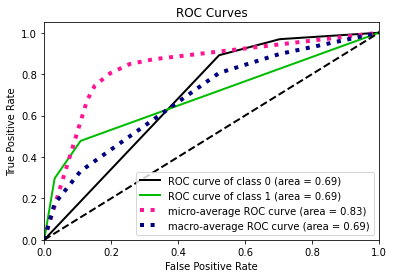

In [32]:
##reference from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
y_true = Y_test    # ground truth labels
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = DecisionTreeClassifier(max_depth=2).fit(X, Y)
y_probas= clf.predict_proba(X_test)  # predicted probabilities generated by sklearn classifier 
# print(y_probas)
# print(clf.predict(X_test))
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

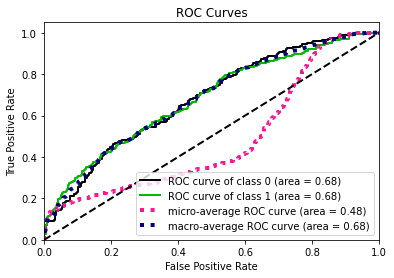

In [33]:
y_true = Y_test    # ground truth labels
clf1= GaussianNB().fit(X, Y)
y_probas_1= clf1.predict_proba(X_test)  # predicted probabilities generated by sklearn classifier   
# print(y_probas_1)
skplt.metrics.plot_roc(y_true, y_probas_1)
plt.show()

Q3-4

In [34]:
# From the earlier part 3 we have 
## predicted class labels from Decision Tree Classifier 
y_true = Y_test 
dt = DecisionTreeClassifier(max_depth=2).fit(X, Y)
y_pred= dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [35]:
# From the earlier part 3 we have 
## predicted class labels from Naive Bayes Classifier 
y_true = Y_test 
nb = GaussianNB().fit(X, Y)
y_pred1= nb.predict(X_test)
y_pred1

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [36]:
# We would use Wilcoxon Signed-Rank Test. The p value is very small so we have to reject the Null Hypothesis and take the alternative hypothesis. This implies that one classifier is more effective and significantly better than the other.  

wilcoxon(y_pred,y_pred1, correction =False)

WilcoxonResult(statistic=3204.0, pvalue=6.503695643549932e-149)